## MEDICAL COSTS

In [2]:
# Import libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the database
medical_costs = pd.read_csv('medical_costs.csv', delimiter=',')

In [4]:
# Printing the first rows
medical_costs.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,male,15.6,2,yes,northwest,17907.54
1,24,male,29.8,0,yes,northeast,16312.64
2,50,male,29.0,5,no,northwest,6819.21
3,35,male,34.0,1,no,southeast,5247.87
4,31,female,17.6,3,yes,southeast,17525.49


In [5]:
# Checking data types and null values
medical_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           10000 non-null  int64  
 1   Sex           10000 non-null  object 
 2   BMI           10000 non-null  float64
 3   Children      10000 non-null  int64  
 4   Smoker        10000 non-null  object 
 5   Region        10000 non-null  object 
 6   Medical Cost  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [6]:
# Descriptive analysis of variables
medical_costs.describe()

,Age,BMI,Children,Medical Cost
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.678400,27.40301,2.501700,11898.932216
std,13.807724,7.22896,1.701672,6073.875834
min,18.000000,15.00000,0.000000,3617.090000
25%,30.000000,21.10000,1.000000,5909.925000
50%,42.000000,27.40000,2.000000,7957.430000
75%,54.000000,33.70000,4.000000,17931.962500
max,65.000000,40.00000,5.000000,20268.210000


In [7]:
smoker_stats = medical_costs.groupby(['Smoker'])
smoker_stats.describe().T

Smoker                       no           yes
Age          count  5008.000000   4992.000000
             mean     41.508586     41.848758
             std      13.836499     13.778079
             min      18.000000     18.000000
             25%      29.000000     30.000000
             50%      42.000000     42.500000
             75%      54.000000     54.000000
             max      65.000000     65.000000
BMI          count  5008.000000   4992.000000
             mean     27.399860     27.406170
             std       7.214393      7.244266
             min      15.000000     15.000000
             25%      21.200000     21.100000
             50%      27.400000     27.400000
             75%      33.700000     33.700000
             max      40.000000     40.000000
Children     count  5008.000000   4992.000000
             mean      2.479433      2.524038
             std       1.701976      1.701244
             min       0.000000      0.000000
             25%       1.000000      1.000000
             50%       2.000000      3.000000
             75%       4.000000      4.000000
             max       5.000000      5.000000
Medical Cost count  5008.000000   4992.000000
             mean   5894.855096  17922.253173
             std     849.620184    852.074885
             min    3617.090000  15421.730000
             25%    5258.260000  17292.030000
             50%    5910.735000  17934.305000
             75%    6531.472500  18548.782500
             max    8166.970000  20268.210000

This data shows the difference in medical costs between smokers and non-smokers. The mean cost for smokers is three times that of non-smokers. In addition, the minimum cost for smokers was 15.4 thousand, while that for non-smokers was 3.6 thousand.

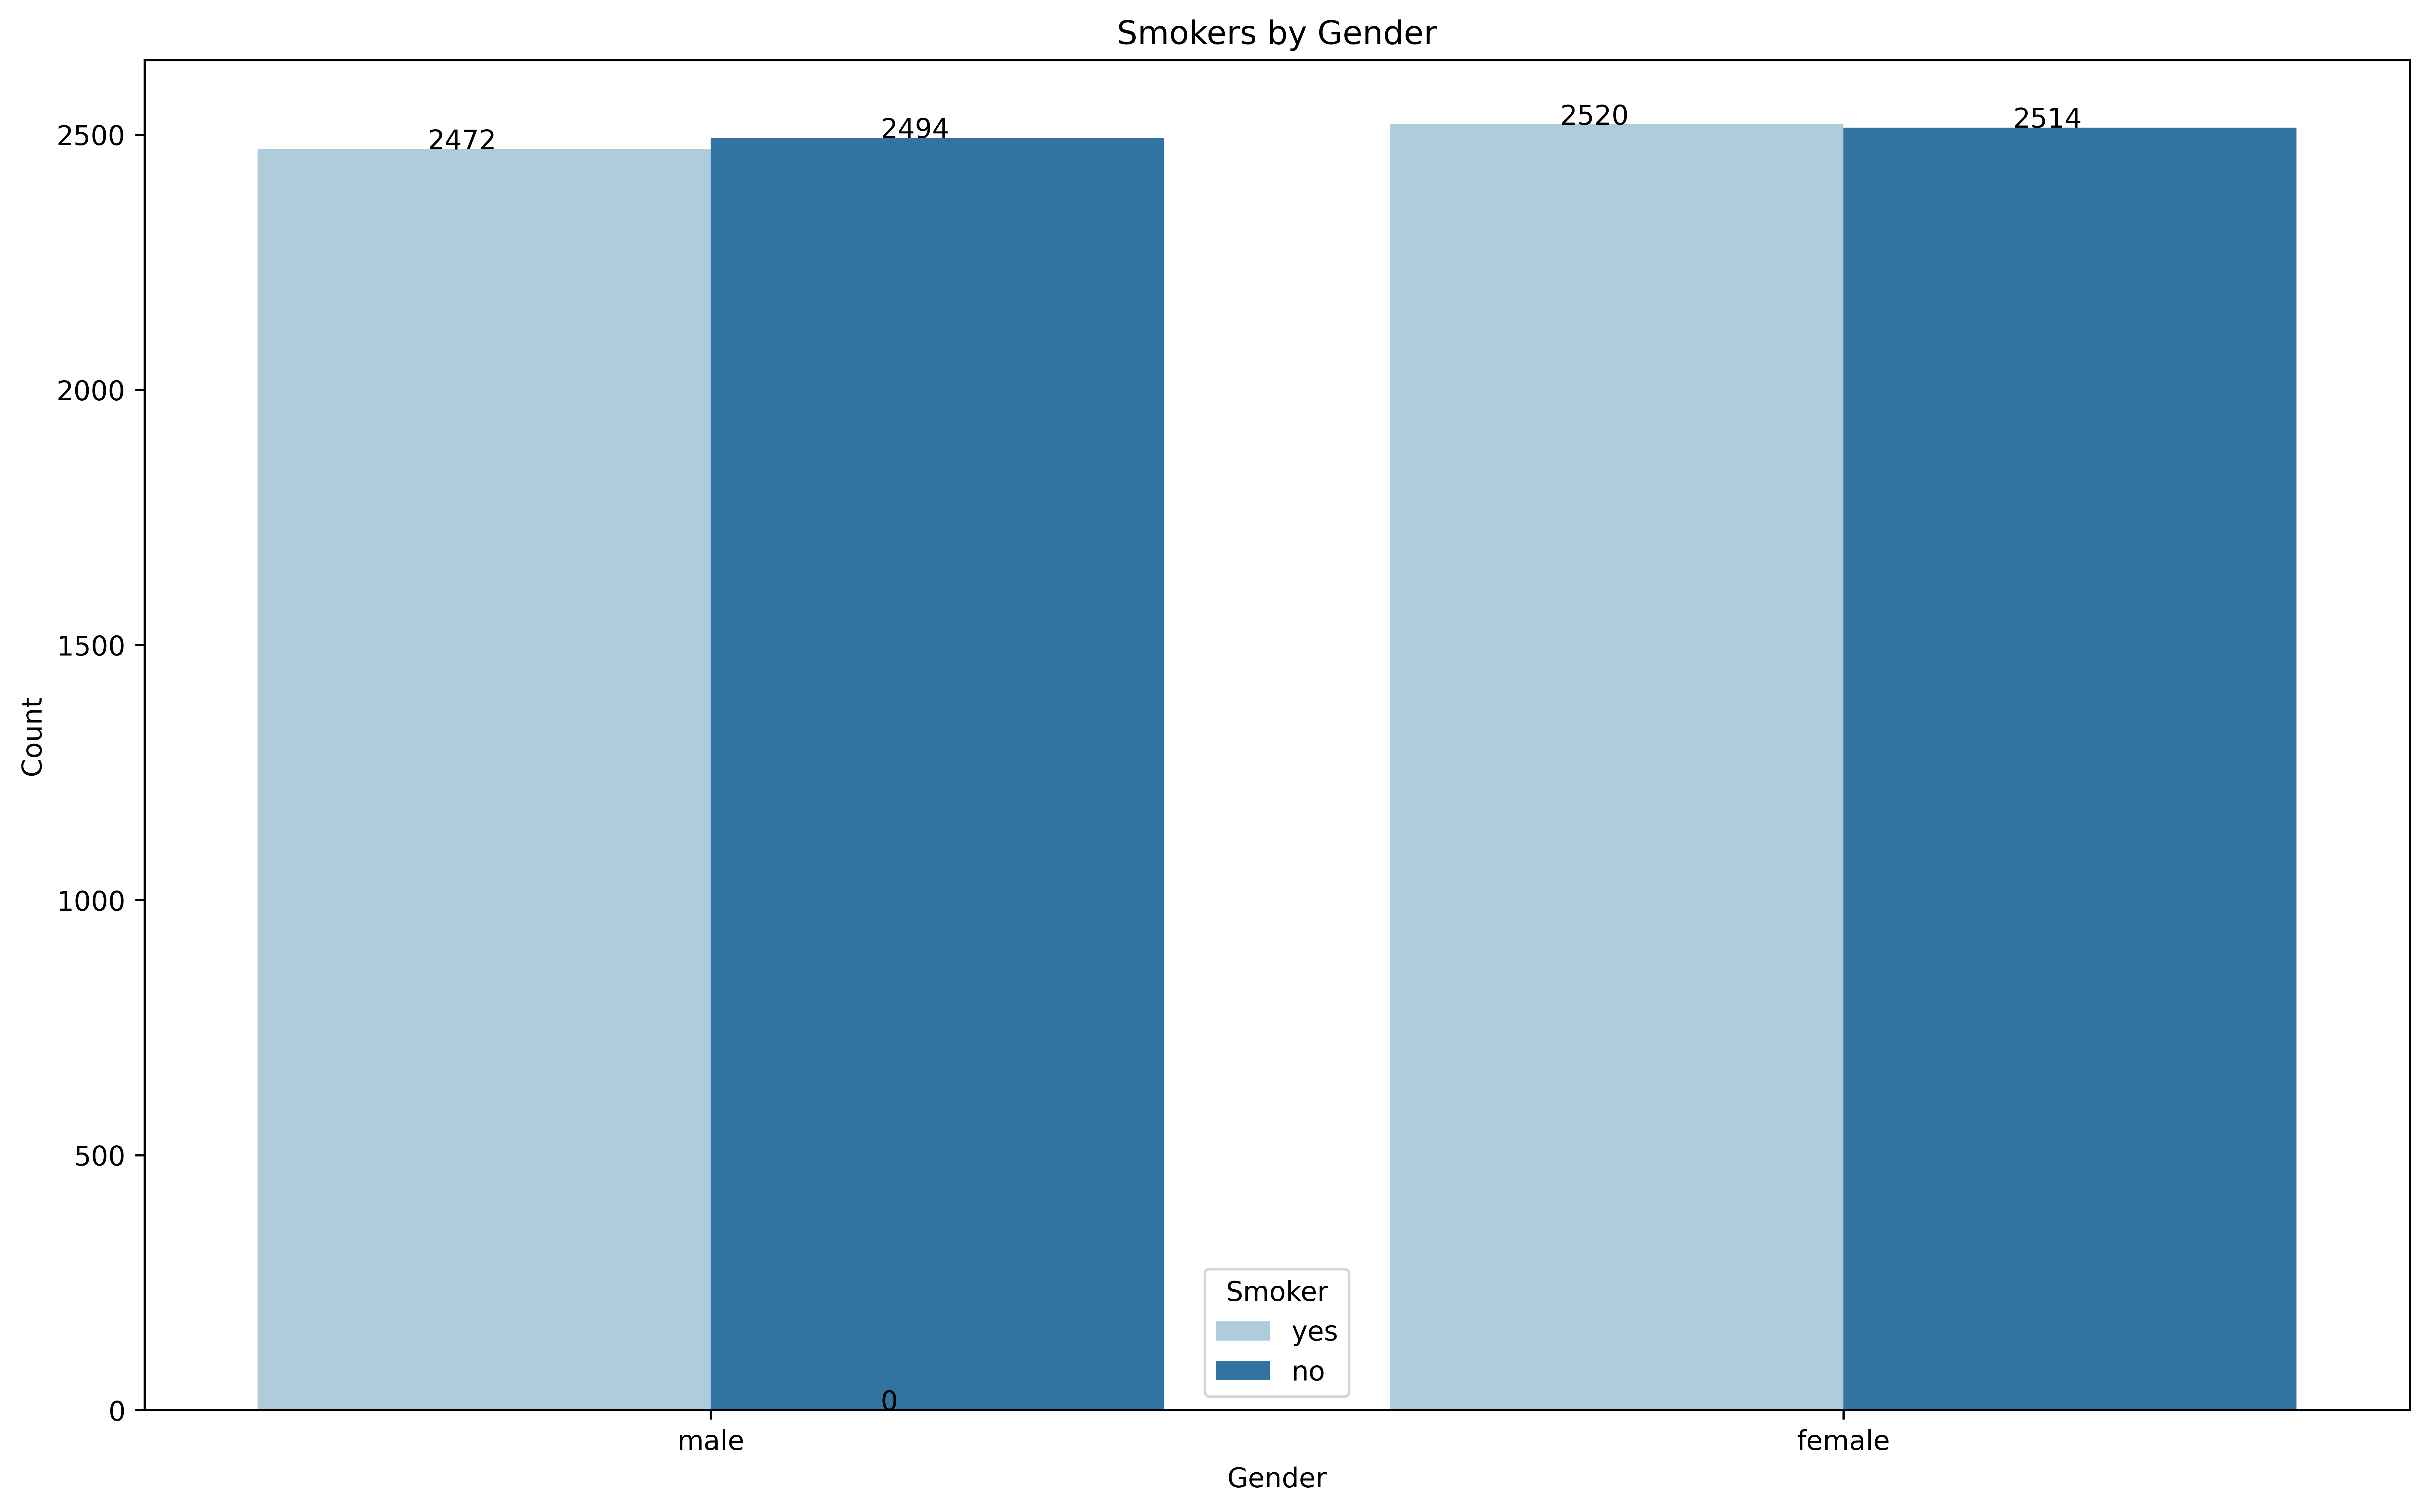

In [9]:
# Creating a bar chart to show the number of smokers and non-smokers by gender
plt.figure(figsize=(15,9), dpi=600)
ax = sns.countplot(x='Sex', hue='Smoker', data=medical_costs, palette='Paired')
# Plotting the numbers on the chart
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))
plt.title('Smokers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The values for smokers and non-smokers are very similar between the genres, there is no significant difference

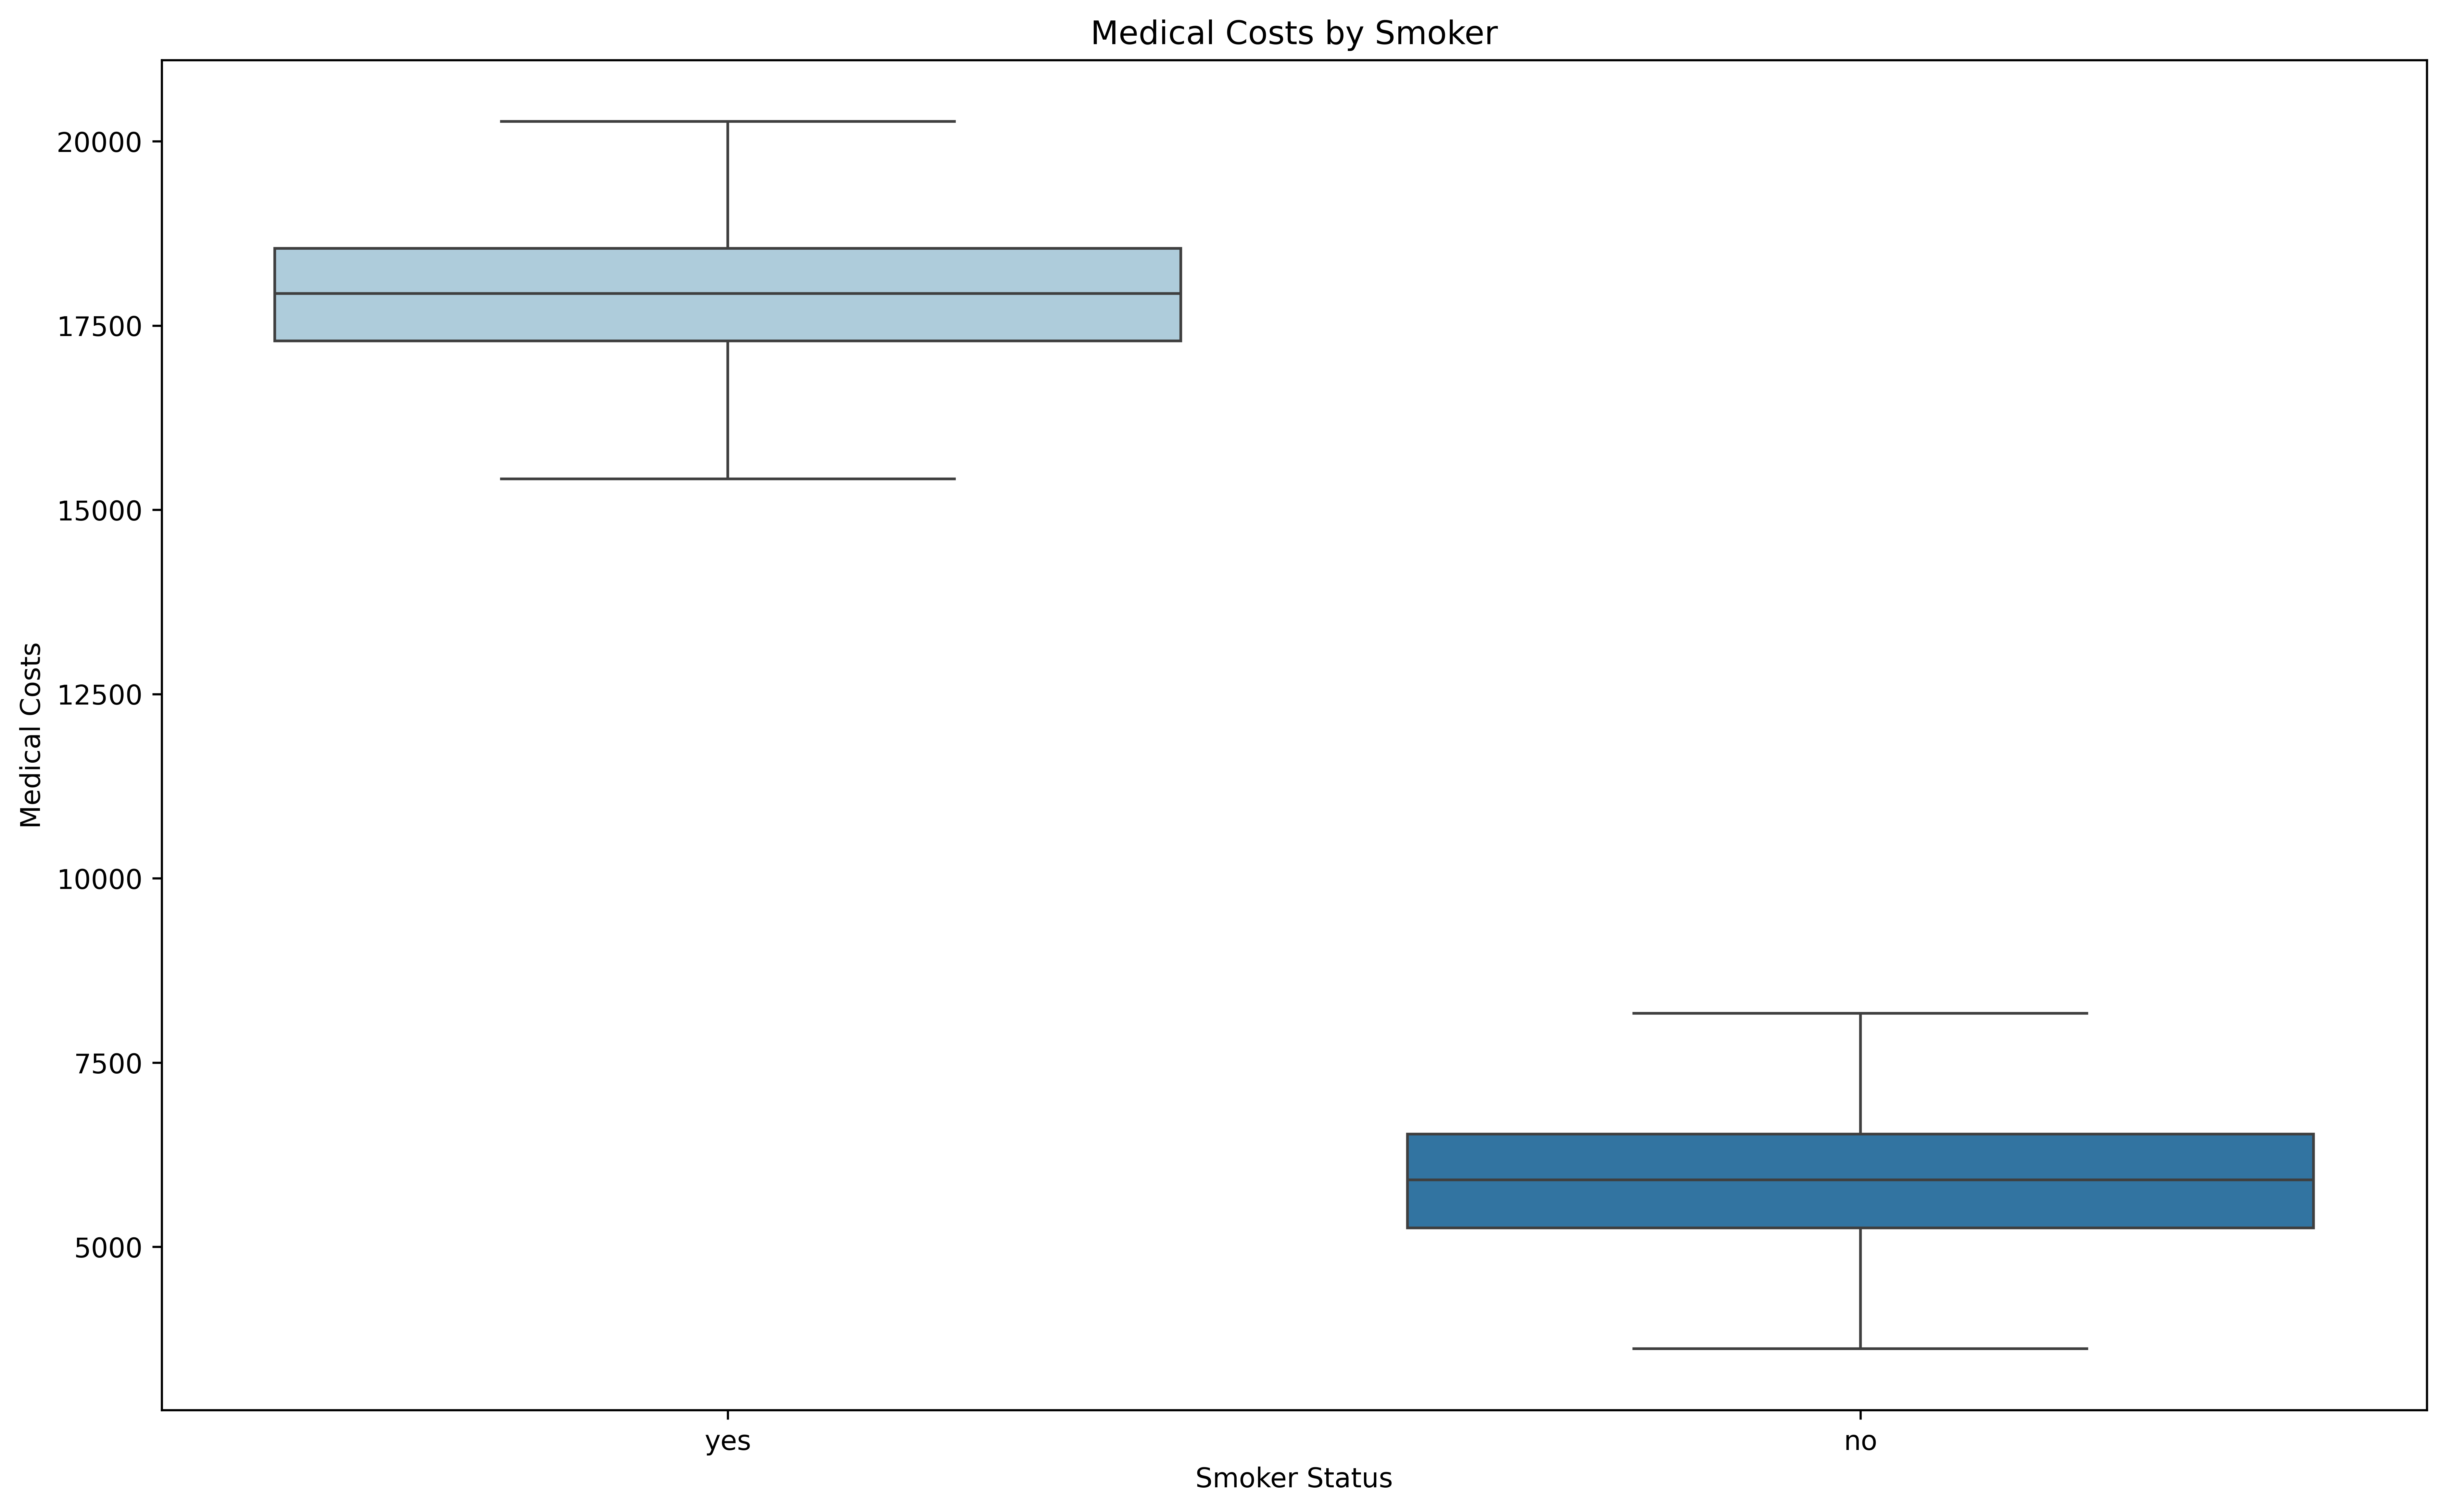

In [11]:
# Creating a boxplot to show medical cost data by smokers and non-smokers
plt.figure(figsize=(15,9), dpi=600)
sns.boxplot(x='Smoker', y='Medical Cost', hue='Smoker', data=medical_costs, palette='Paired')
plt.title('Medical Costs by Smoker')
plt.xlabel('Smoker Status')
plt.ylabel('Medical Costs')
plt.show()

The boxplot shows the difference in medical costs between smokers and non-smokers. Smokers have significantly higher medical costs.

C:\Users\ofrag\AppData\Local\Temp\ipykernel_5348\2049367114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Medical Cost', palette='Paired', data=medical_costs)


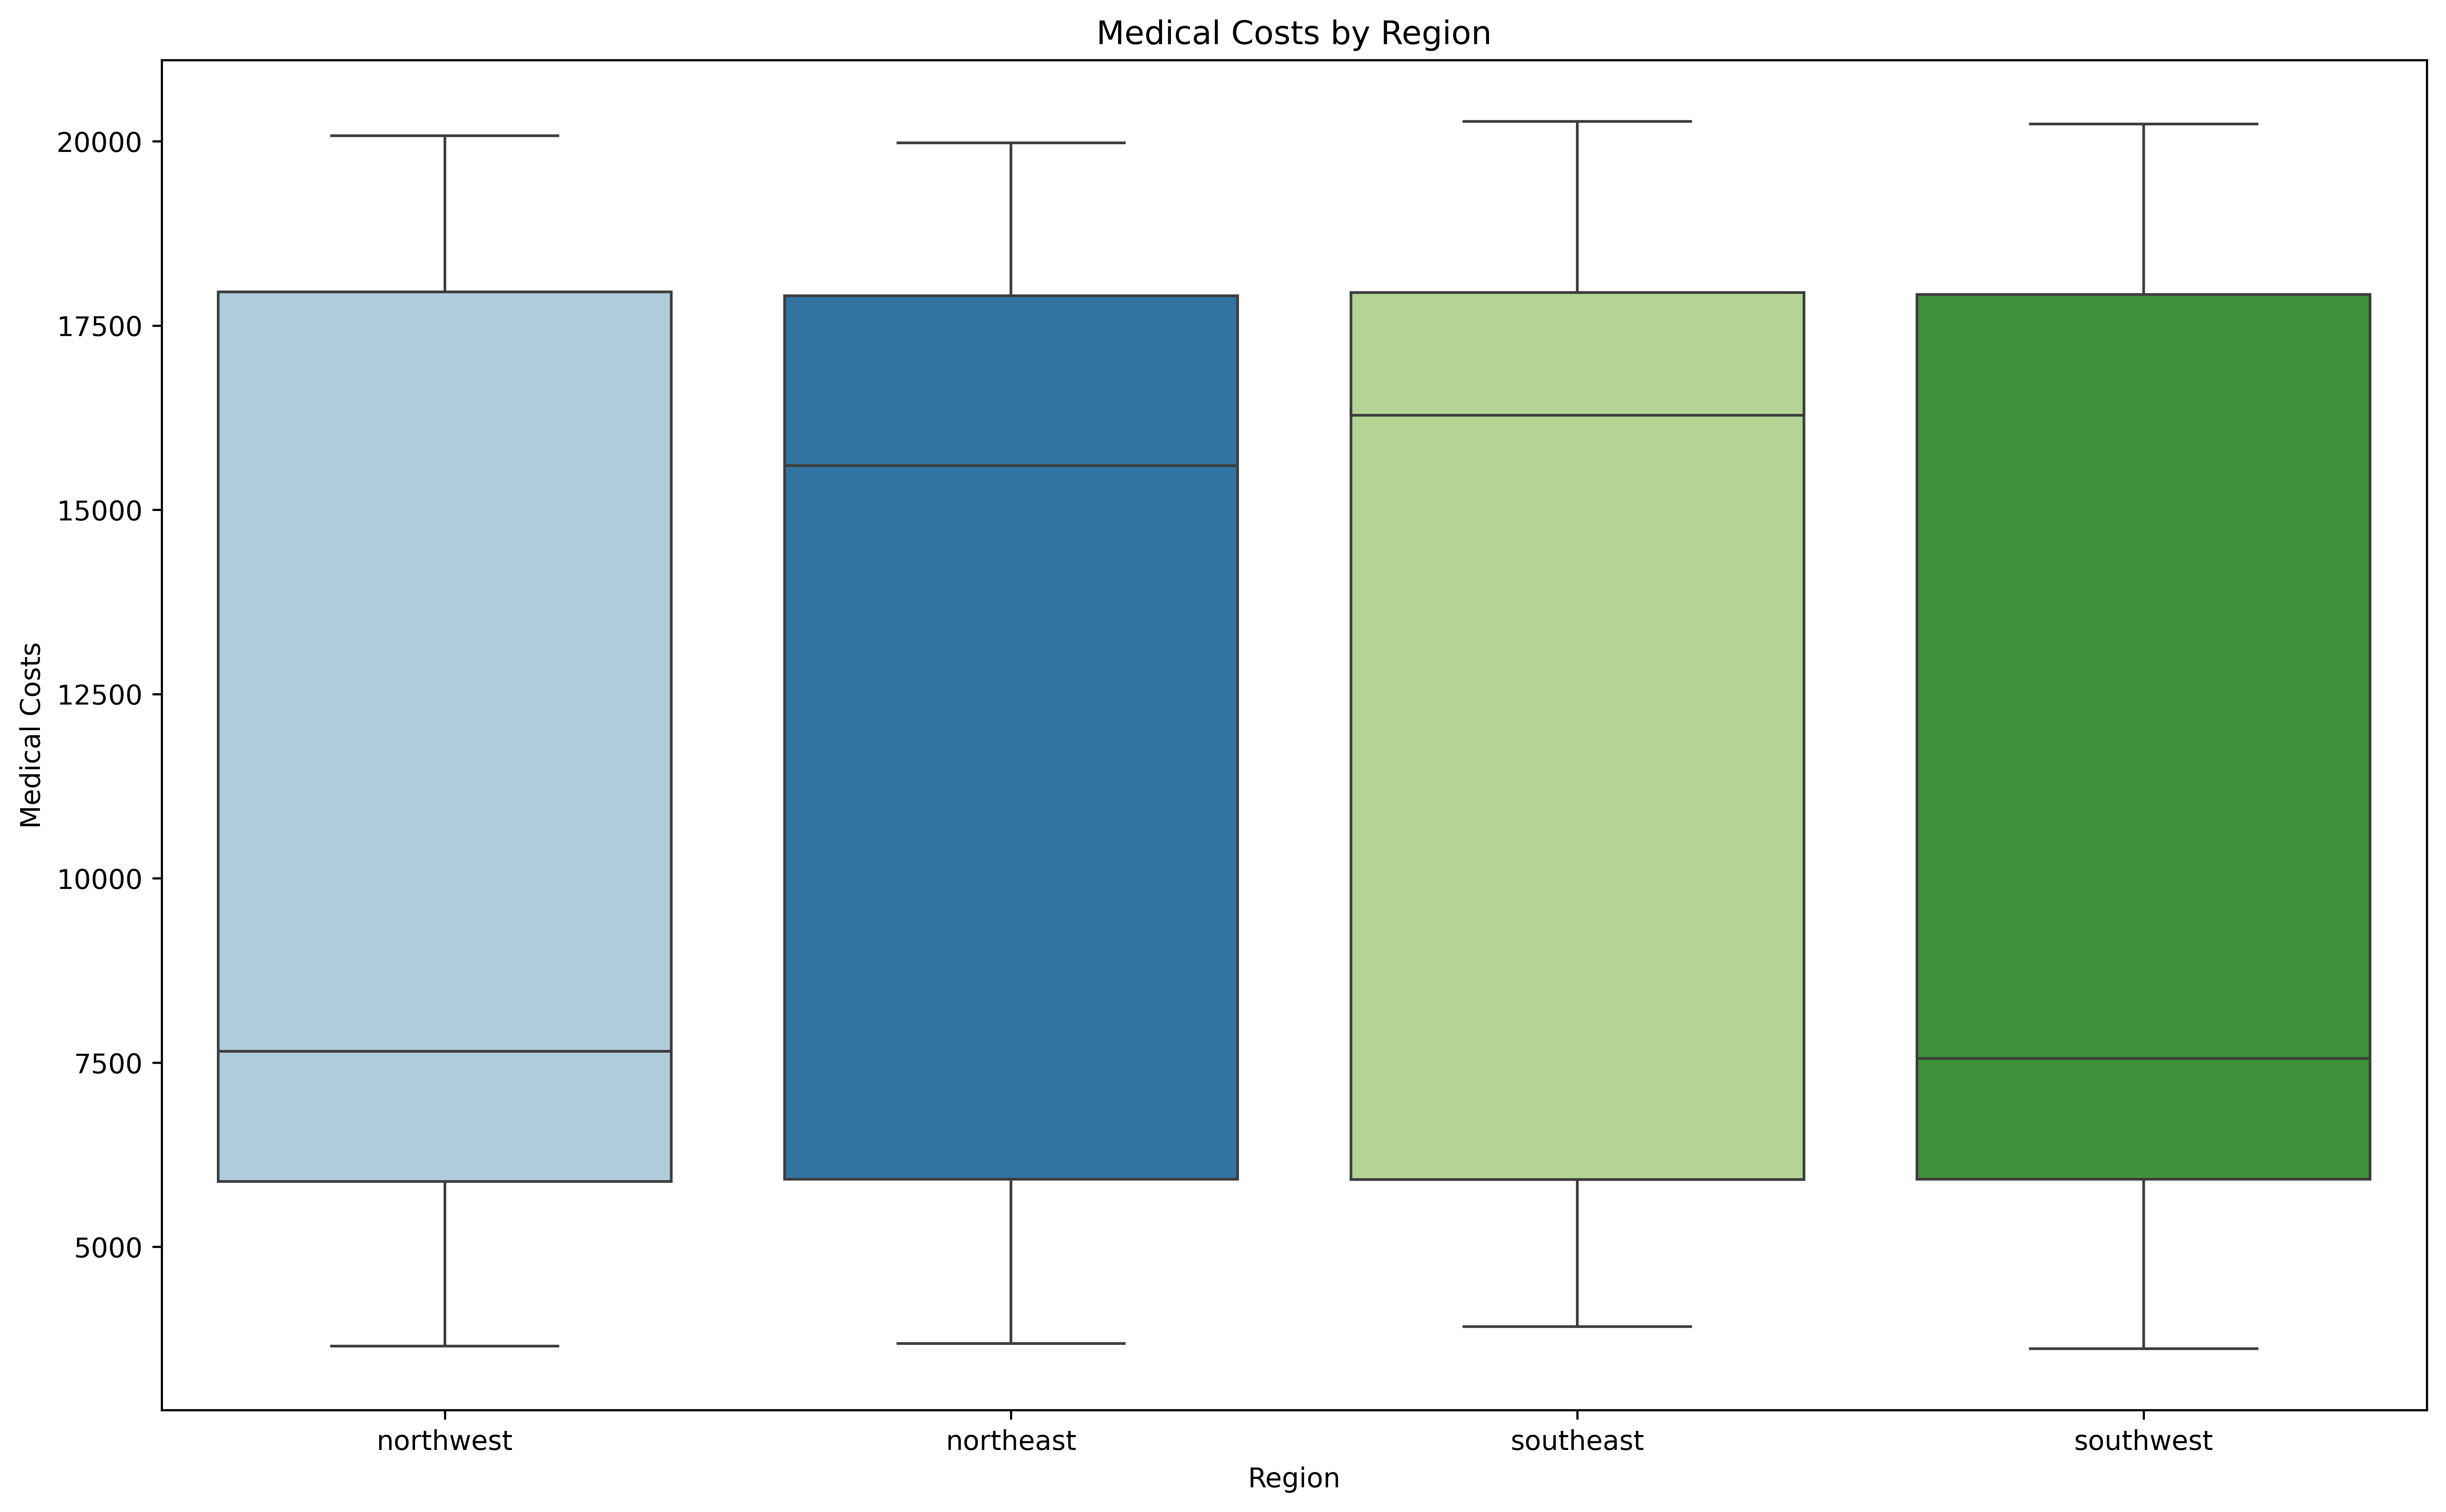

In [13]:
# Creating a boxplot to show medical cost data by regions
plt.figure(figsize=(15, 9), dpi=600)
sns.boxplot(x='Region', y='Medical Cost', palette='Paired', data=medical_costs)
plt.title('Medical Costs by Region')
plt.xlabel('Region')
plt.ylabel('Medical Costs')
plt.show()

The boxplots of medical costs by region show that with the exception of the median, the first and third quartiles between the regions are similar.

The northwest and southwest regions are positive skewed, there is a higher concentration of values between the first quartile and the median, so the mean is higher than the median.

The opposite is true for the northeast and southeast regions, where there is a higher concentration of values between the median and the third quartile, so the mean is lower than the median, and these boxplots are characterised as negative skewed.

In [17]:
# Transforming the text values in the categorical variables to numerical values 
# So they can be used in the correlation matrix
from sklearn.preprocessing import LabelEncoder

new_df = medical_costs

label_Sex = LabelEncoder()
label_Smoker = LabelEncoder()
label_Region = LabelEncoder()

new_df['Sex_'] = label_Sex.fit_transform(new_df['Sex'])
new_df['Smoker_'] = label_Sex.fit_transform(new_df['Smoker'])
new_df['Region_'] = label_Sex.fit_transform(new_df['Region'])

new_df = new_df.drop(['Sex', 'Smoker', 'Region'], axis=1)
new_df.head()

,Age,BMI,Children,Medical Cost,Sex_,Smoker_,Region_
0,58,15.6,2,17907.54,1,1,1
1,24,29.8,0,16312.64,1,1,0
2,50,29.0,5,6819.21,1,0,1
3,35,34.0,1,5247.87,1,0,2
4,31,17.6,3,17525.49,0,1,2


In [18]:
# Creating the correlation matrix
corr_df = new_df.corr()
corr_df.columns = corr_df.columns.str.replace('_', '')
corr_df.head()

,Age,BMI,Children,Medical Cost,Sex,Smoker,Region
Age,1.000000,-0.005848,-0.004944,0.125649,-0.004142,0.012319,0.006610
BMI,-0.005848,1.000000,0.014562,0.035249,-0.002566,0.000436,-0.017636
Children,-0.004944,0.014562,1.000000,0.069575,0.010997,0.013107,-0.000420
Medical Cost,0.125649,0.035249,0.069575,1.000000,-0.003113,0.990141,-0.002428
Sex_,-0.004142,-0.002566,0.010997,-0.003113,1.000000,-0.002811,0.001521


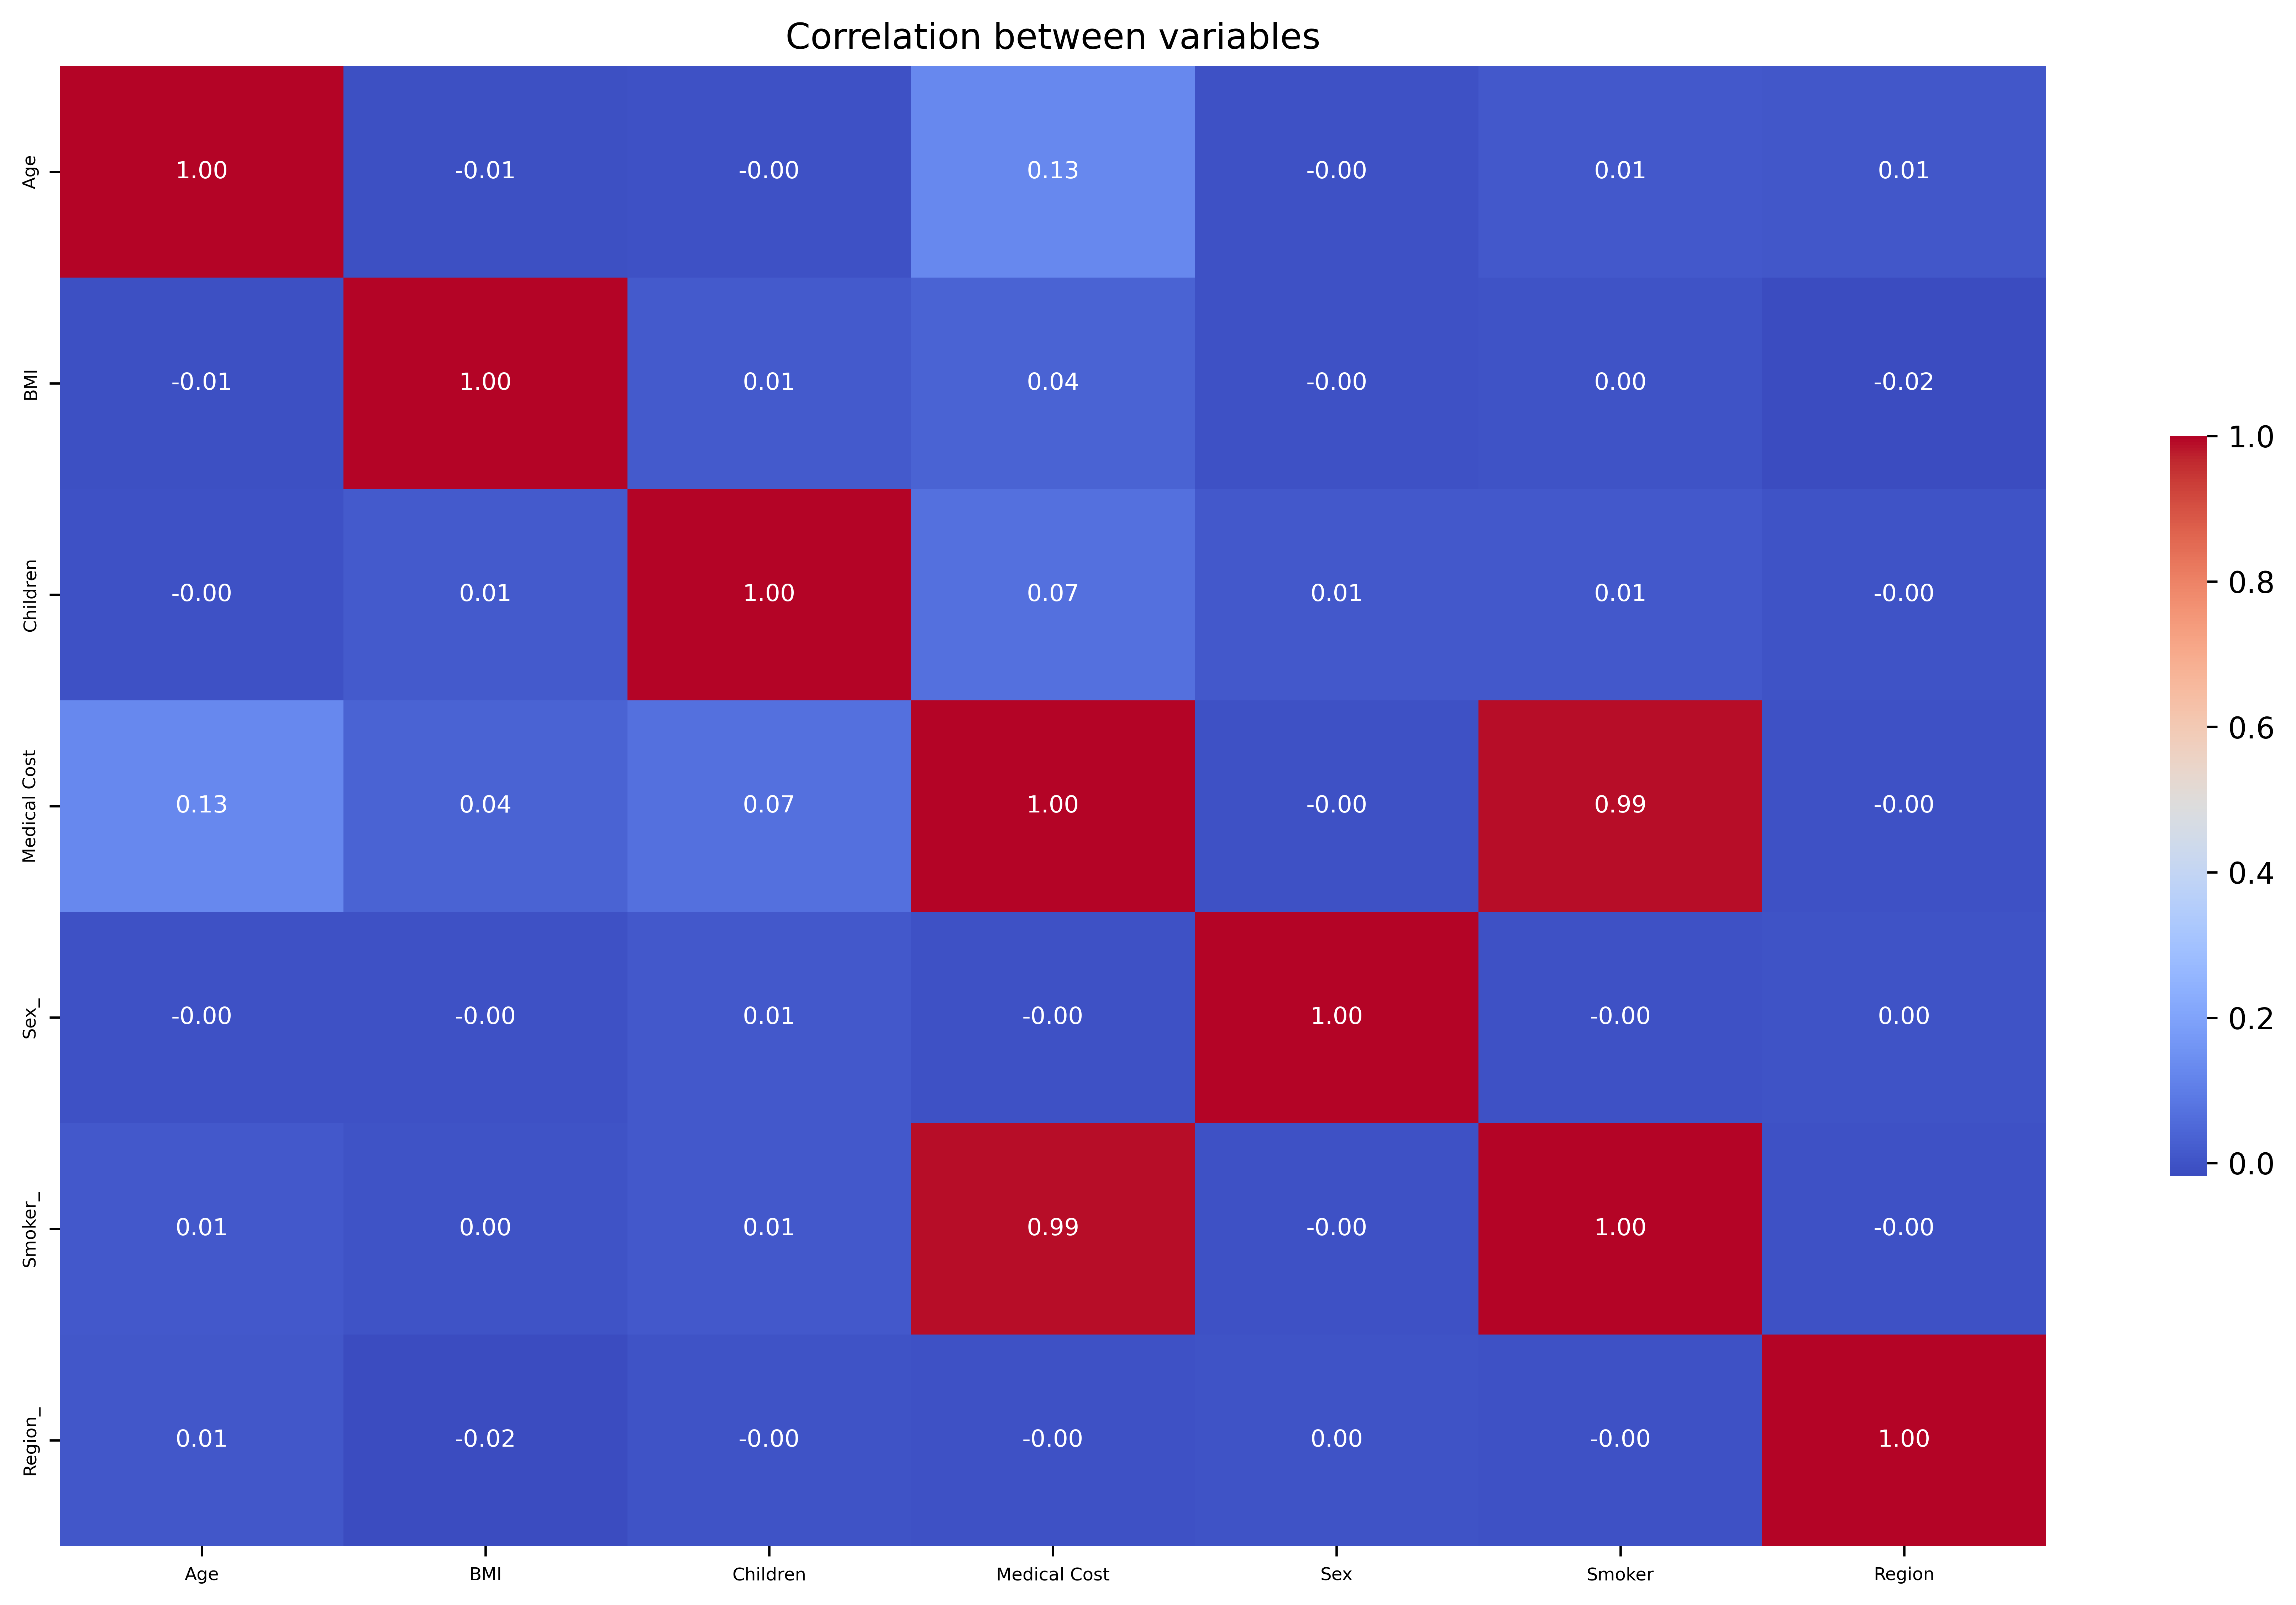

In [19]:
# Creating a heatmap to illustrate the correlation matrix
plt.figure(figsize=(15,9), dpi=600)
sns.heatmap(data=corr_df, annot=True, fmt='.2f', annot_kws={'size':8}, cbar_kws={'shrink':0.5}, cmap='coolwarm')
plt.title('Correlation between variables')
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

There is only one statistically significant correlation, and that is between smoking status and medical costs. So if the person is a smoker, the medical cost will be higher.